In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) - results from citipy calls
output_data_file = "./cities.csv"
data_output_file = "./weather_data.html"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

659

In [22]:
# prepare to collect data from json

city_l =[]
country_l = []
lat_l = []
lon_l = []
cloudy_l = []
date_l = []
humidity_l = []
min_temp_l = []
max_temp_l = []
wind_l = []
id_l = []



## Perform API Calls

In [23]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Base URL for Weather Map API Call
end_point = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"


In [24]:
# loop through the list of cities making the weather api call 
# and then extract the data from the response.
cnt = 0
cnum = 0
o_file = open(output_data_file, "w", newline=None)
o_file.write(f"Preparing to process the list of cities\n")
o_file.write( f"All API calls will be made to end point:\n\t {end_point},")
for city in cities:
    url = end_point + "&APPID=" + api_key + "&q=" + city 
    #o_file.write(f"Calling API for city: {city}\n")
    resp = requests.get(url).json()
    if (cnt >= 49):
        cnt = 0
        o_file.flush()
        time.sleep(2)
    cnt = cnt + 1
    if (resp["cod"] == 200):
        cnum = cnum + 1
        city_l.append(resp["name"])
        country_l.append(resp["sys"]["country"])
        lat_l.append(resp["coord"]["lat"])
        lon_l.append(resp["coord"]["lon"])
        cloudy_l.append(resp["clouds"]["all"])
        date_l.append(resp["dt"])
        humidity_l.append(resp["main"]["humidity"])
        min_temp_l.append(resp["main"]["temp_min"])
        max_temp_l.append(resp["main"]["temp_max"])
        id_l.append(resp["id"])
        wind_l.append(resp["wind"]["speed"])
        o_file.write(f'City: {city} id: {resp["id"]} processed. # {cnum} \n')
    else:
        o_file.write(f'Error code: {resp["cod"]} on call for city: {city}\n') 
        o_file.write(f'Message: {resp["message"]}\n')
o_file.close()


In [25]:
#Verify number unique cities.
len(city_l)

587

In [26]:
# Create data frame
dict = {"city": city_l, "country": country_l, "id": id_l,
        "lat" : lat_l,  "lon" : lon_l, "cloudy" : cloudy_l,
        "date" : date_l, "humidity" : humidity_l,
        "min_temp" : min_temp_l, "max_temp" : max_temp_l,
        "wind" : wind_l }
df = pd.DataFrame( dict )
df.head()

,city,country,id,lat,lon,cloudy,date,humidity,min_temp,max_temp,wind
0,Ushuaia,AR,3833367,-54.81,-68.31,40,1539111600,74,37.40,39.20,10.29
1,Carauari,BR,3664659,-4.88,-66.90,12,1539113995,39,97.49,97.49,4.79
2,Christchurch,NZ,2192362,-43.53,172.64,64,1539111600,47,55.40,55.40,12.75
3,Yellowknife,CA,6185377,62.45,-114.38,5,1539111600,51,39.20,39.20,14.99
4,Hambantota,LK,1244926,6.12,81.12,76,1539113995,100,77.42,77.42,11.56


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
city        587 non-null object
country     587 non-null object
id          587 non-null int64
lat         587 non-null float64
lon         587 non-null float64
cloudy      587 non-null int64
date        587 non-null int64
humidity    587 non-null int64
min_temp    587 non-null float64
max_temp    587 non-null float64
wind        587 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 50.5+ KB


Text(0,0.5,'Max Temperature (F)')

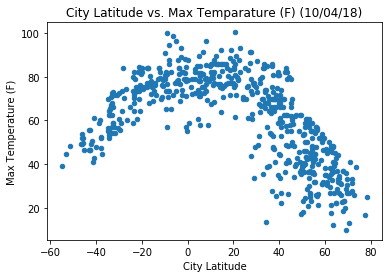

In [11]:
ax = df.plot.scatter(x="lat", y="max_temp",  
                     title="City Latitude vs. Max Temparature (F) (10/04/18)",
                     legend=False)
ax.set_xlabel("City Latitude") 
ax.set_ylabel("Max Temperature (F)")


This plot shows that there is a relationship between latitude and max. temperature.  The highest temperatures are group right above the Equator (latitude 0 degrees). Another trend that probably reflects the data that we used is that it seems that there are less cities represented especially in the higher southern latitudes. Also, the southern cities seem to have, in general, higher temperatures.  This could reflect the time of year (i.e. Southern Hemisphere summer) of the data.  

Text(0,0.5,'Humidity (%)')

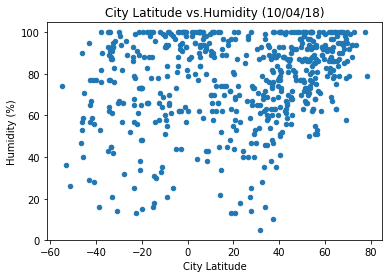

In [12]:
ax = df.plot.scatter(x="lat", y="humidity",  
                     title="City Latitude vs.Humidity (10/04/18)",
                     legend=False)
ax.set_xlabel("City Latitude") 
ax.set_ylabel("Humidity (%)")


This plot of latitude vs. humidity shows that there is not a relationship between latitude and humidity.  There are many cities that are near 100% humidity that are scattered from 40 degrees south of the equator to 70-75 degrees north of the equator with at or near 100%. Probably the best that the plot shows is that every one has humidity!

Text(0,0.5,'Cloudiness')

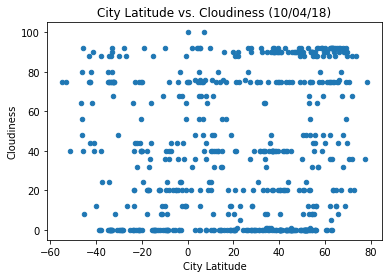

In [13]:
ax = df.plot.scatter(x="lat", y="cloudy",  
                     title="City Latitude vs. Cloudiness (10/04/18)",
                     legend=False)
ax.set_xlabel("City Latitude") 
ax.set_ylabel("Cloudiness")

Text(0,0.5,'Wind Speed (mph)')

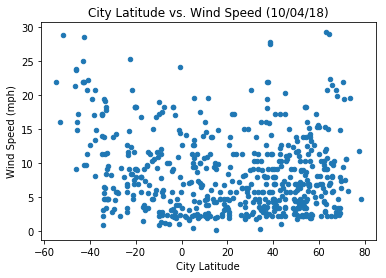

In [14]:
ax = df.plot.scatter(x="lat", y="wind",  
                     title="City Latitude vs. Wind Speed (10/04/18)",
                     legend=False)
ax.set_xlabel("City Latitude") 
ax.set_ylabel("Wind Speed (mph)")

Well, the plot of Latitidue vs. wind speed seems to show that everyone has wind, but no apparent relationship between latitude vs. wind speed. The plot seems to provide some support for an older description of the region surronding the Equator, the Doldrums.  A large concentration of lower wind speeds seem to be located in the range of 20 degrees south to 20 degres north of the Equator.  Maybe there was some truth to that old sailors' lament.


In [28]:
html_data = df.to_html()

In [29]:
o_file = open(data_output_file, "w", newline=None)
o_file.write(html_data)
o_file.close()
